# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
import pandas as pd

df = pd.read_csv("/content/Profissao- Cientista de Dados_M10_support material.csv")

df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [ ]:
# Verificando o formato antes de realizar o tratamento:

df.shape

(15000, 16)

In [ ]:
# Tratando os dados:

df = df.dropna()
df = df.drop_duplicates()

df.shape

(12466, 16)

<ipython-input-5-5e2212640018>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr(), figsize=[7,7], center=0, cmap=cmap)


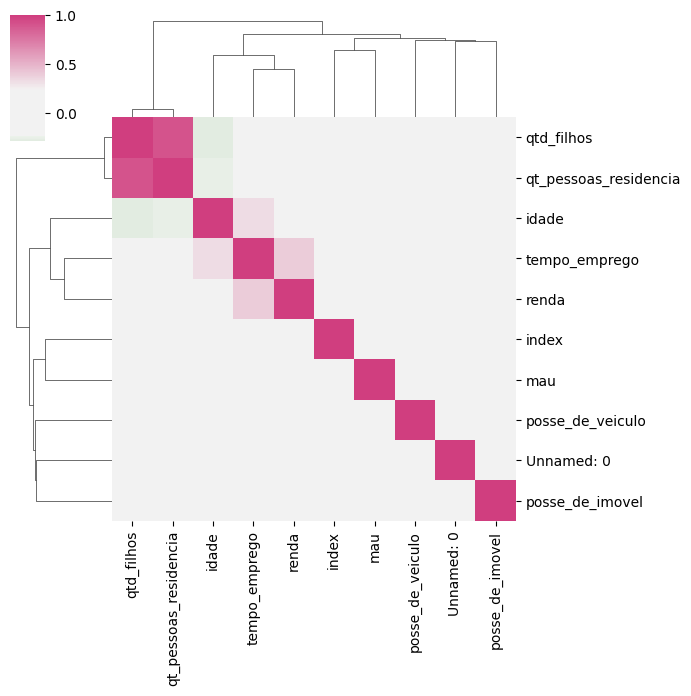

In [ ]:
# Criando uma matriz de correlação, como forma de avaliar
# quais são as variáveis que apresentam maior correlação com
# o nível de renda:

cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True,
                             sep=60, center="light")

sns.clustermap(df.corr(), figsize=[7,7], center=0, cmap=cmap)

* **Dúvida:**

É compreendido que o tempo de estudo, a escolaridade, da pessoa influi no seu nível de renda obtido, de tal forma que se realizar um teste de hipótese qualquer tomando como hipótese nula de que não há influência o ***valor-p*** obtido será próximo de zero, bem distante de ultrapassar o coeficiente de singificância comumente adotado de 5%, possibiliando, assim, que rejeitamos a hipótese nula, assumindo que, sim, o nível de educação influencia na renda contraída. Desse modo, por que ao realizar a matriz de correlação a coluna **educação** sequer apareceu?

**Resposta:**

A matriz de correlação não trabalha com variáveis categórias, por isso que a coluna de educação não aparece, mesmo ela, como variável, seja extremamente influente na geração de renda.

In [ ]:
df.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

In [ ]:
# A partir da matriz de correlação pode-se compreender que as variáveis que
# possuem correlação são: qtd_filhos, qtd_pessoas_residencia, idade,
# tempo_emprego e renda.

# Como pude concluir isso? Pelos "quadrados" formados no gráfico.

# Desse modo, criarei um dataframe que compreende apenas as colunas que apresentam
# índice de correlação entre ambas:

df = df[["qtd_filhos", "qt_pessoas_residencia", "idade",
        "tempo_emprego", "renda"]]

df.head()

,qtd_filhos,qt_pessoas_residencia,idade,tempo_emprego,renda
0,1,3.0,36,3.575342,3369.24
1,0,2.0,42,0.860274,6096.14
2,2,4.0,31,8.065753,5658.98
3,0,2.0,50,1.208219,7246.69
4,0,2.0,52,13.873973,4017.37


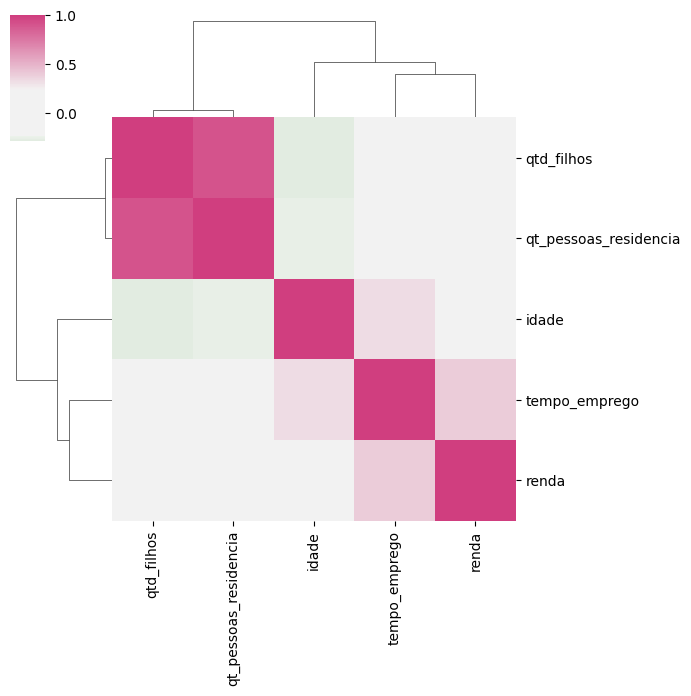

In [ ]:
# Realizando mais uma matriz de correlação para mensurar quais são
# as melhores variáveis que se relacionam com à renda:

cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True,
                             sep=60, center="light")

sns.clustermap(df.corr(), figsize=[7,7], center=0, cmap=cmap)

In [ ]:
# Analisando melhor a matriz de correlação, tomando como base
# o nível de renda, não consigo idenfificar uma relação clara
# com a quantidade de filhos com o nível de renda, havendo apenas,
# em potencial, em relação à quantidade de pessoas na residência, uma
# vez que, considerando todos como população econômicamente ativa (PEA), a
# renda total seria o somatório dos seus residentes.

# Entretanto, prefiro adotar uma análise que desconsidere tal potencial
# e que se concentre nas reais varíaveis que apresentam impacto na geração
# de renda. A partir do que há aqui disponível, considerarei apenas as
# variáveis idade, renda e tempo de emprego. Assim:

df = df[["renda", "tempo_emprego", "idade"]]
df.head()

,renda,tempo_emprego,idade
0,3369.24,3.575342,36
1,6096.14,0.860274,42
2,5658.98,8.065753,31
3,7246.69,1.208219,50
4,4017.37,13.873973,52


* Gráfico de dispersão relacionando renda e tempo de emprego:

Text(0, 0.5, 'tempo de emprego')

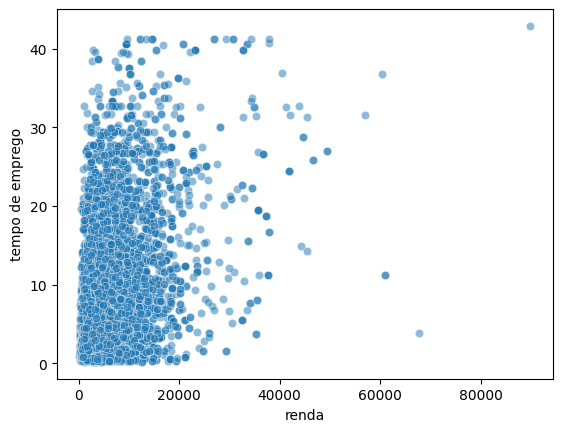

In [ ]:
sns.scatterplot(x="renda",
                y="tempo_emprego",
                alpha=0.5,
                data=df)
plt.xlabel("renda")
plt.ylabel("tempo de emprego")

* **Dúvida:**

O gráfico parece meio torto, isso é normal?

* Gráfico de dispersão relacionando renda e idade:

Text(0, 0.5, 'idade')

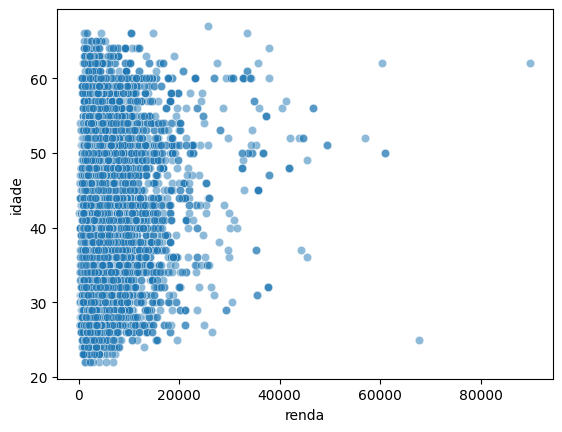

In [ ]:
sns.scatterplot(x="renda",
                y="idade",
                alpha=0.5,
                data=df)
plt.xlabel("renda")
plt.ylabel("idade")

* Gráfico de dispersão relacionando renda, tempo de emprego e idade:

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

Text(0, 0.5, 'tempo de emprego')

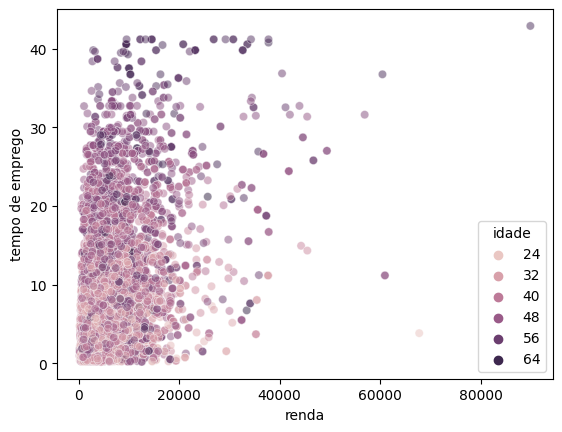

In [ ]:
sns.scatterplot(x="renda",
                y="tempo_emprego",
                alpha=0.5,
                data=df,
                hue="idade")
plt.xlabel("renda")
plt.ylabel("tempo de emprego")

3) Na su aopinião, há outliers na variável renda?

Sim, a partir dos gráficos gerados, concebe-se a presença de outiliers no gráfico, començando a partir de um nível de renda que, aproximadamente, seja equivalente a 25k, sendo que a maior proporção da renda vai até 20k, como os dados mostram.  

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [ ]:
df_log = df.copy()
df_log.head()

,renda,tempo_emprego,idade
0,3369.24,3.575342,36
1,6096.14,0.860274,42
2,5658.98,8.065753,31
3,7246.69,1.208219,50
4,4017.37,13.873973,52


In [ ]:
df_log["renda_log"] = np.log(df_log["renda"])

df_log.head()

,renda,tempo_emprego,idade,renda_log
0,3369.24,3.575342,36,8.122442
1,6096.14,0.860274,42,8.715411
2,5658.98,8.065753,31,8.640999
3,7246.69,1.208219,50,8.888300
4,4017.37,13.873973,52,8.298383


Text(0, 0.5, 'renda')

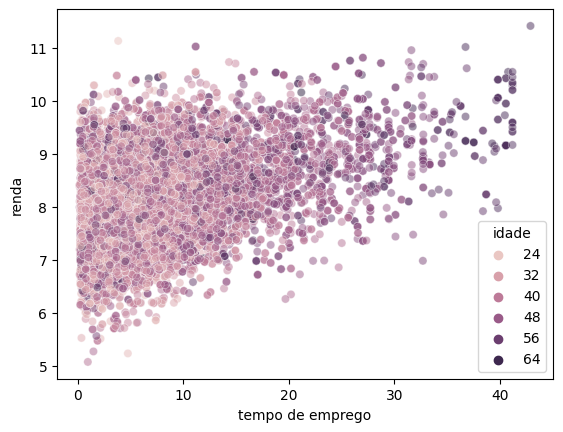

In [ ]:
# Realizando a análise com o logarítimo da renda:

sns.scatterplot(x="tempo_emprego",
                y="renda_log",
                alpha=0.5,
                data=df_log,
                hue="idade")
plt.xlabel("tempo de emprego")
plt.ylabel("renda")

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Suponho que melhorou a análise, principalmente porque permitiu identificar melhor a existência de uma tendência, com base na densidade dos dados, ainda que exista ainda a presença de outiliers que a escapam.